# MinSum reviewed
Min-Sum is an approximation to belief propagation, but we can see it as an implementation of BP.
The usual presentation of goes like this:

There are variable nodes and check nodes, and they send messages between them (check nodes to variable nodes and variable nodes to check nodes, but not check to check or variable to variable !).
After a few rounds of this, the information we want is in the variable nodes (hopefully).

In the classical case we have a message $\vec{m}$ that is encoded (using a generator matrix $G$) into a codeword: $G\cdot\vec{m} = \vec{c}$.

Then we "send" the codeword $\vec{c}$ through a noisy channel, and obtain $\vec{r} = \vec{c} + \vec{n}$, where $\vec{n}$ is a noise vector.

On the "recieve"side, we have a matrix, $H$, called the parity check matrix, and the codewords are in $ker\{H\}$, so $H\cdot \vec{c} = \vec{0}$.

So, unless the noise $\vec{n}$ is also in $ker\{H\}$, we have $H\cdot (\vec{c} + \vec{n}) = \vec{0} + H\cdot \vec{n} = \vec{s} \neq \vec{0}$.

The part $H\cdot \vec{n}$ is called the syndrome, and if it is non zero, then we know there is some noise.

In the classical case, the variable nodes are the observed bits (or approximation of them) from a channel, and the check nodes are defined as the XOR equations that the bits in the codeword must satisfy.

Note that, In the classical case, we don't care about the error $\vec{e}$, we only care about the uncorrupt codeword $\vec{c}$.

Actually, in the classical case we don't even care about the uncorrupt copdeword $\vec{c}$, we actually only really care about the message $\vec{m}$ that was encoded into the codeword.

In the quantum case (which we haven't really discussed yet), we ONLY care about the error $\vec{e}$ (in fact if we could decode the "message" it would not be very quantum of us ...)

In the cell below we'll use a parity matrix, randomize some errors comprising of 1 bit flip and see if BP can fix them.

In [1]:
from qecc.utils import minSumEvaluateCode, memBPEvaluateCode
from qecc.polynomialCodes import A1_HX
import numpy as np
numberOfTransmissions = 20
seed = 123456
errorRange = np.linspace(0.001, 0.1, 10)
numberOfIterations = 50
H = A1_HX.astype(np.int32)
berArrayMemBP = memBPEvaluateCode(numberOfTransmissions, seed, errorRange, numberOfIterations, H)
berArrayMinSum = minSumEvaluateCode(numberOfTransmissions, seed, errorRange, numberOfIterations, H)

Error prob 0.001, corresponding to i==0
Time it took the decoder:
0.39815258979797363
And the throughput is:
12758.927431760872
Error prob 0.012, corresponding to i==1
Time it took the decoder:
1.144524335861206
And the throughput is:
4438.525106744467
Error prob 0.023000000000000003, corresponding to i==2
Time it took the decoder:
5.185672760009766
And the throughput is:
979.6221696006968
Error prob 0.034, corresponding to i==3
Time it took the decoder:
13.633153200149536
And the throughput is:
372.62106025070415
Error prob 0.045000000000000005, corresponding to i==4
Time it took the decoder:
16.42752957344055
And the throughput is:
309.23700227045487
Error prob 0.05600000000000001, corresponding to i==5
Time it took the decoder:
17.366376638412476
And the throughput is:
292.5192805483448
Error prob 0.067, corresponding to i==6
Time it took the decoder:
17.49098300933838
And the throughput is:
290.4353630260692
Error prob 0.07800000000000001, corresponding to i==7
Time it took the dec

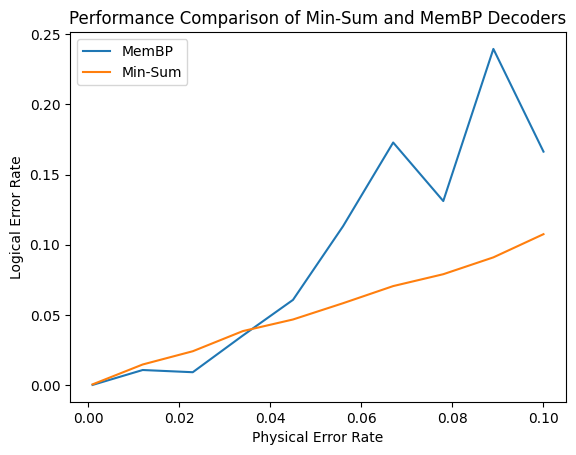

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(errorRange, berArrayMemBP, label='MemBP')
ax.plot(errorRange, berArrayMinSum, label='Min-Sum')
ax.set_xlabel('Physical Error Rate')
ax.set_ylabel('Logical Error Rate')
ax.set_title('Performance Comparison of Min-Sum and MemBP Decoders')
ax.legend()
plt.show()